In [1]:
import sys, os, glob, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
# local imports
from src import Compose_Event, Draw_Compose_Event
from src import SttCSVDataReader, Draw_CSVReader_Event, SttTorchDataReader, Draw_TorchReader_Event

### _Dataset_

In [7]:
# mu+mu- data (current)
input_dir = './train_all'

In [8]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)

# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, ''))
                       for f in all_files if f.endswith(suffix))

print("Total Files: ", len(file_prefixes))

Total Files:  100000


In [9]:
# load an event
event_prefix = file_prefixes[9496]
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

# memory usage
mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(os.path.basename(event_prefix), mem_bytes / 2**20))

event0000009496 memory usage 0.03 MB


In [10]:
# hits.head()
# tubes.head()
# particles.head()
# truth.head()

### SttCSVReader

In [11]:
# reader = SttCSVReader(path=input_dir,selection=True,noise=False,skewed=False)

In [12]:
# event_id = 4
# read = reader(event_id)

In [13]:
# read.event.pdgcode.unique()

In [14]:
# Draw_Reader_Event(data=read,figsize=(9,9),save_fig=False);

### _Compose Event_
- _`Compose_Event()` is same as `select_hits()` in `processing/utils/event_utils.py`_

In [15]:
event = Compose_Event(event_prefix, selection=False, noise=False, skewed=False)
event.columns

Index(['hit_id', 'x', 'y', 'z', 'volume_id', 'layer_id', 'module_id',
       'isochrone', 'skewed', 'sector_id', 'r', 'phi', 'theta', 'eta', 'tx',
       'ty', 'tz', 'tpx', 'tpy', 'tpz', 'weight', 'particle_id', 'vx', 'vy',
       'vz', 'q', 'nhits', 'pt', 'ptheta', 'peta', 'event_id'],
      dtype='object')

In [16]:
event.nhits.shape == event.pt.shape

True

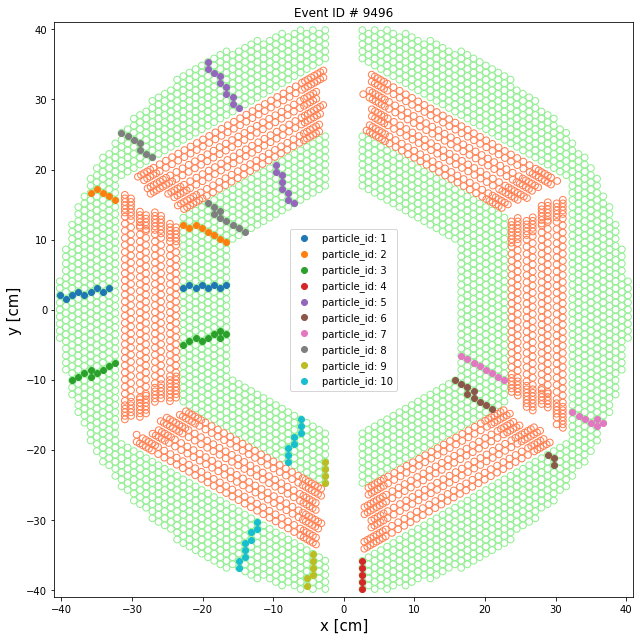

In [17]:
Draw_Compose_Event(event,figsize=(9,9),save_fig=False);

- _test if `selction` flag works_

In [18]:
# event = Compose_Event(event_prefix, selection=True, noise=False, skewed=False)
# Draw_Compose_Event(event,figsize=(9,9),save_fig=False);

- _add decay vertex parameters `d0 = sqrt(vx**2+vy**2)`, `z0=vz`_

In [19]:
from LightningModules.Processing.utils.event_utils import select_hits

In [20]:
kwarg={"selection": False}

In [21]:
event = select_hits(event_file=event_prefix, noise=False, skewed=False, **kwarg)
event.columns

Index(['hit_id', 'x', 'y', 'z', 'volume_id', 'layer_id', 'module_id',
       'isochrone', 'skewed', 'sector_id', 'layer', 'r', 'phi', 'theta', 'eta',
       'tx', 'ty', 'tz', 'tpx', 'tpy', 'tpz', 'weight', 'particle_id', 'vx',
       'vy', 'vz', 'q', 'pdgcode', 'pt', 'ptheta', 'peta', 'pphi', 'event_id'],
      dtype='object')

In [22]:
event.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,isochrone,skewed,sector_id,...,vx,vy,vz,q,pdgcode,pt,ptheta,peta,pphi,event_id
0,1,-6.122800,-15.655,35.0,9,0,48,0.275327,0,2,...,0.0,0.0,0.0,-1,-13,1.149280,1.421704,0.149648,-1.951910,9496
1,42,-13.995000,11.110,35.0,9,0,14,0.332921,0,0,...,0.0,0.0,0.0,-1,-13,1.162427,1.931512,-0.368803,2.469261,9496
2,67,16.618999,-6.565,35.0,9,0,72,0.375478,0,4,...,0.0,0.0,0.0,-1,-13,1.279557,1.378150,0.193849,-0.421664,9496
3,93,15.744300,-10.100,35.0,9,0,68,0.132307,0,3,...,0.0,0.0,0.0,-1,-13,0.543841,2.391074,-0.931592,-0.632010,9496
4,113,-6.997490,15.150,35.0,9,0,6,0.114902,0,0,...,0.0,0.0,0.0,1,13,0.562793,1.646640,-0.075917,2.053543,9496


In [23]:
e = event.iloc[0]

In [24]:
np.sqrt(e.vx**2 + e.vy**2)

0.0

In [25]:
e.ptheta, np.cos(e.ptheta)

(1.421703815460205, 0.14854077251713438)

In [26]:
e.ptheta*180/np.pi, np.cos(e.ptheta)*180/np.pi

(81.4576283435158, 8.51075935084465)

In [27]:
e.peta

0.14964798092842102

- _further analysis_

In [28]:
# read.event_file

In [29]:
# read.hits.head()
# read.tubes.head()
# read.particles.head()
# read.event.head()

In [30]:
# read.event.layer.unique()

In [31]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-0.234118,0.071150,-0.172884,1,25,13,0
1,2,0.0,0.0,0.0,-0.331922,0.230110,0.230414,1,21,13,0
2,3,0.0,0.0,0.0,-0.588180,-0.094274,0.372358,1,26,13,0
3,4,0.0,0.0,0.0,-0.016249,-0.634970,0.388219,1,5,13,0
4,5,0.0,0.0,0.0,-0.218361,0.524184,-0.042902,1,25,13,0


- _Drop Duplicates in "Particles"_

In [32]:
# particles = event.particles.copy() # copy() it otherwise event.particles is changed
# particles['nhits'] = particles.groupby(['particle_id'])['nhits'].transform('count')
# particles.drop_duplicates(inplace=True, ignore_index=True)
# particles.head(10)

- _Filter some particles in "Particles"_

In [33]:
# there are particle we don't need e.g. electron (11), (1000010020), etc
particles.pdgcode.unique()

array([ 13, -13])

In [34]:
# see all particle in the particle dataframe
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-0.234118,0.071150,-0.172884,1,25,13,0
1,2,0.0,0.0,0.0,-0.331922,0.230110,0.230414,1,21,13,0
2,3,0.0,0.0,0.0,-0.588180,-0.094274,0.372358,1,26,13,0
3,4,0.0,0.0,0.0,-0.016249,-0.634970,0.388219,1,5,13,0
4,5,0.0,0.0,0.0,-0.218361,0.524184,-0.042902,1,25,13,0


In [35]:
# just keep protons, pions and maybe muon, don't forget resetting index and dropping old one.
particles[particles['pdgcode'].isin([-2212, 2212, -211, 211])].reset_index(drop=True)

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time


- _renaming layers_

In [36]:
# hits.head()

In [37]:
# vlids = hits.layer_id.unique()
# n_det_layers = len(vlids)
# vlid_groups = hits.groupby(['layer_id'])
# hits = pd.concat([vlid_groups.get_group(vlids[i]).assign(layer_id=i) for i in range(n_det_layers)]).reset_index(drop=True)

In [38]:
# hits.head()

### _Test Processed Data_

In [39]:
from src.drawing import detector_layout, draw_proc_event

In [40]:
inputdir="run_quick/feature_store"
num_files = sorted(glob.glob(os.path.join(inputdir, "*")))

In [41]:
print("Number of loaded files: ", len(num_files))

Number of loaded files:  20000


In [42]:
data = torch.load(num_files[0], map_location=device)

In [43]:
data

Data(x=[145, 3], pid=[145], layers=[145], event_file='/home/adeak977/current/3_deeptrkx/ctd2022_mumu/train_quick/event0000100000', hid=[145], pt=[145], vertex=[145, 3], charge=[145], pdgcode=[145], ptheta=[145], peta=[145], pphi=[145], modulewise_true_edges=[2, 136], layerwise_true_edges=[2, 147], edge_index=[2, 608], y_pid=[608])

In [44]:
event_id = int(os.path.basename(data.event_file)[-4:])

In [45]:
r  = data.x[:, 0]
phi= data.x[:, 1]
ir = data.x[:, 2]

In [46]:
r

tensor([0.1663, 0.1663, 0.1669, 0.1669, 0.1681, 0.1699, 0.1749, 0.1752, 0.1752,
        0.1761, 0.1761, 0.1775, 0.1775, 0.1826, 0.1838, 0.1843, 0.1843, 0.1851,
        0.1854, 0.1854, 0.1871, 0.1919, 0.1924, 0.1927, 0.1927, 0.1935, 0.1935,
        0.1948, 0.1948, 0.1951, 0.2012, 0.2017, 0.2020, 0.2028, 0.2028, 0.2028,
        0.2043, 0.2043, 0.2050, 0.2072, 0.2087, 0.2099, 0.2109, 0.2109, 0.2121,
        0.2121, 0.2121, 0.2121, 0.2150, 0.2150, 0.2173, 0.2187, 0.2192, 0.2201,
        0.2215, 0.2215, 0.2215, 0.2222, 0.2249, 0.2249, 0.2274, 0.2274, 0.2283,
        0.2294, 0.2294, 0.2310, 0.2310, 0.2314, 0.2349, 0.2375, 0.2413, 0.2413,
        0.2449, 0.2476, 0.2577, 0.3240, 0.3246, 0.3268, 0.3284, 0.3284, 0.3330,
        0.3330, 0.3362, 0.3376, 0.3379, 0.3379, 0.3415, 0.3421, 0.3421, 0.3456,
        0.3456, 0.3474, 0.3474, 0.3474, 0.3505, 0.3505, 0.3512, 0.3551, 0.3551,
        0.3551, 0.3572, 0.3589, 0.3595, 0.3612, 0.3629, 0.3640, 0.3646, 0.3646,
        0.3671, 0.3675, 0.3686, 0.3712, 

In [47]:
vx = data.vertex[:, 0]
vy = data.vertex[:, 1] 
vz = data.vertex[:, 2]

In [48]:
vx

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])

In [49]:
vy

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])

In [50]:
np.sqrt(vx[0]**2+vy[0]**2)

tensor(0.)

In [51]:
d0 = torch.sqrt(vx**2+vy**2)

In [52]:
d0[0]

tensor(0.)

In [53]:
ptheta = data.ptheta
peta = data.peta

In [54]:
ptheta*180/np.pi

tensor([ 48.2917,  19.9607, 125.3122,  30.1674, 122.3036, 130.4202,  19.9808,
         48.2424,  79.8536,  30.2366, 125.2658, 122.3068, 130.3759,  15.2090,
         19.9559,  48.2167, 125.2489,  79.8461, 122.3095,  30.2677, 130.5116,
         80.2864,  19.9400,  15.1871,  48.2059, 125.2373,  30.2327, 122.2994,
        130.5329,  79.8230,  19.9215,  48.2427,  80.2718,  15.2205,  30.2267,
        125.2241, 122.2939, 130.5002,  79.8121,  80.2979,  15.1438,  19.9427,
        125.2038,  48.2414,  30.1666,  80.3094, 130.4200, 122.2840,  79.8234,
         15.0441,  80.2997,  19.9414,  48.2246, 125.1404, 122.2986, 130.3551,
         30.1300,  80.2794,  79.8181,  15.0367,  19.9575,  80.2638,  48.2498,
        130.2784, 125.1505, 122.2969,  30.1514,  14.9449,  79.8189,  80.2735,
         14.9508,  79.8533,  79.8964,  80.2745,  80.2675,  19.9186, 130.3064,
         48.2835, 125.1190, 122.3539,  19.9191, 130.2967,  48.2349,  29.8104,
        125.1273, 122.3512, 130.2922, 130.2588,  19.9131,  48.22

In [55]:
peta

tensor([ 0.8023,  1.7374, -0.6595,  1.3111, -0.5963, -0.7725,  1.7364,  0.8035,
         0.1780,  1.3087, -0.6585, -0.5964, -0.7715,  2.0136,  1.7377,  0.8041,
        -0.6581,  0.1782, -0.5964,  1.3077, -0.7746,  0.1704,  1.7385,  2.0151,
         0.8043, -0.6579,  1.3089, -0.5962, -0.7751,  0.1786,  1.7394,  0.8035,
         0.1706,  2.0128,  1.3091, -0.6576, -0.5961, -0.7743,  0.1788,  0.1701,
         2.0179,  1.7383, -0.6572,  0.8035,  1.3112,  0.1699, -0.7725, -0.5959,
         0.1786,  2.0246,  0.1701,  1.7384,  0.8039, -0.6558, -0.5962, -0.7710,
         1.3124,  0.1705,  0.1787,  2.0251,  1.7376,  0.1708,  0.8033, -0.7693,
        -0.6560, -0.5962,  1.3117,  2.0313,  0.1786,  0.1706,  2.0309,  0.1780,
         0.1773,  0.1706,  0.1707,  1.7396, -0.7699,  0.8025, -0.6554, -0.5973,
         1.7396, -0.7697,  0.8037,  1.3236, -0.6556, -0.5973, -0.7696, -0.7688,
         1.7399,  0.8039, -0.6557, -0.5973, -0.6558,  1.3231, -0.7704,  1.7399,
         0.1783, -0.5972,  0.8029, -0.65

In [56]:
pphi =  data.pphi

In [57]:
pphi*180/np.pi

tensor([  -8.8259,   56.5973, -110.6487,   73.8308,  -10.4023,  176.3994,
          56.1470,   -9.2951, -143.1195,   75.0233, -110.1613,  -10.5359,
         177.0791,    3.8990,   55.6088,   -9.6795, -109.7441, -143.5547,
         -10.6505,   76.4489,  177.7778,  153.2725,   55.0230,    2.2540,
         -10.1086, -109.2611,   77.5709,  -10.7899,  178.4924, -143.9949,
          54.5465,  -10.7247,  153.5125,    0.1963,   79.0007, -108.7578,
         -10.9305,  179.1958, -144.4628,  153.6415,   -1.3435,   53.9040,
        -108.3239,  -11.3109,   80.2763,  153.7485,  179.8694,  -11.0449,
        -144.9530,   -2.6183,  153.9282,   53.4354,  -11.7685, -107.8265,
         -11.1846, -179.3976,   81.5788,  154.0326, -145.4004,   -4.0850,
          52.8144,  154.1379,  -12.3032, -178.6455, -107.3428,  -11.3199,
          82.8482,   -5.9866, -145.8783,  154.3859,   -7.6676, -146.1567,
        -146.3383,  154.6266,  154.8954,   47.0059, -170.9817,  -18.3143,
        -101.7359,  -12.7062,   46.444

In [58]:
# mpl.rcParams.update(mpl.rcParamsDefault)

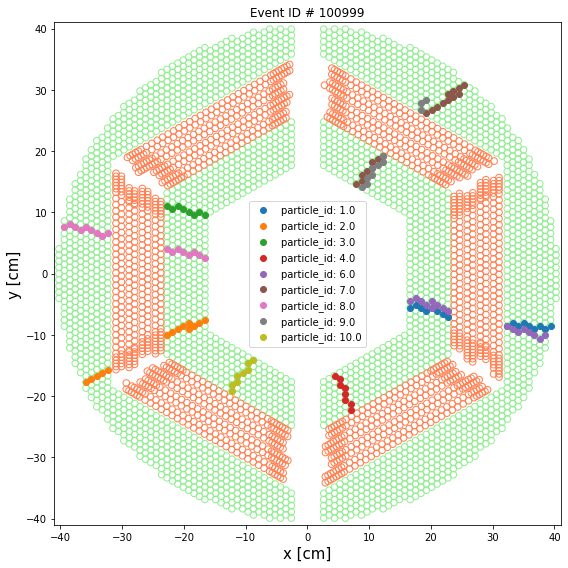

In [59]:
# save test event for visual inspection
for i in range(1000):
    data = torch.load(num_files[i], map_location=device)
    draw_proc_event(data, figsize=(8,8), save_fig=True);